# Linear Regression

#### Inspired by Andrew NG course material and learnt a lot from youtube tutorials(Normalized Nerd)

## FAKE DATA GENERALIZATION USING SKLEARN:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [1]:
from sklearn.datasets.samples_generator import make_regression
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)


/home/hadoop-thiyagu/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
m = 200 #no of training samples

In [3]:
## DATA VISUALIZATION

In [4]:
from matplotlib import pyplot as plt
plt.scatter(X,y,c="red",alpha=.5,marker='*')

### 1) HYPOTHESIS FUNCTION

Since we are going to deal with numpy arrays lets have look abt their dimensionalities

In [5]:
print(len(X))

200


In [6]:
print(type(X))

<class 'numpy.ndarray'>


In [7]:
print(X)

[[-0.05358755]
 [ 0.81490518]
 [ 1.15805552]
 [-0.75361164]
 [ 1.92273803]
 [ 1.22923449]
 [-0.25665373]
 [-0.3916012 ]
 [-0.13390765]
 [ 1.31594368]
 [ 0.75272929]
 [-0.43224009]
 [-0.66643198]
 [ 0.82272281]
 [-1.86451829]
 [-1.52007408]
 [ 0.62675835]
 [ 1.84213516]
 [-1.0844555 ]
 [ 2.18609495]
 [-0.07992433]
 [-0.35957085]
 [-0.27289366]
 [ 2.21796653]
 [ 0.73690722]
 [-0.95172629]
 [ 1.19279792]
 [ 0.19991277]
 [ 0.32154286]
 [-0.22134672]
 [-0.19478459]
 [-0.84640754]
 [-0.01471103]
 [-0.8677184 ]
 [ 0.76579565]
 [-0.11879521]
 [-1.00900322]
 [-0.1968985 ]
 [ 0.59205971]
 [ 0.52423795]
 [ 1.21498404]
 [ 0.52045974]
 [ 0.21215972]
 [ 0.72311791]
 [-0.2327679 ]
 [-0.63968302]
 [-1.95027664]
 [ 0.55642577]
 [-0.41238072]
 [-0.11856477]
 [-0.29594898]
 [ 0.52518578]
 [ 0.49022774]
 [ 0.2630036 ]
 [-1.74434015]
 [-0.21495011]
 [ 0.21348149]
 [ 0.60437586]
 [ 0.2584544 ]
 [ 0.47725678]
 [-0.33175226]
 [-0.33215113]
 [-1.11952533]
 [-0.13055295]
 [-0.14479561]
 [-0.24249065]
 [ 0.02045

In [8]:
print(X[:,0])

[-0.05358755  0.81490518  1.15805552 -0.75361164  1.92273803  1.22923449
 -0.25665373 -0.3916012  -0.13390765  1.31594368  0.75272929 -0.43224009
 -0.66643198  0.82272281 -1.86451829 -1.52007408  0.62675835  1.84213516
 -1.0844555   2.18609495 -0.07992433 -0.35957085 -0.27289366  2.21796653
  0.73690722 -0.95172629  1.19279792  0.19991277  0.32154286 -0.22134672
 -0.19478459 -0.84640754 -0.01471103 -0.8677184   0.76579565 -0.11879521
 -1.00900322 -0.1968985   0.59205971  0.52423795  1.21498404  0.52045974
  0.21215972  0.72311791 -0.2327679  -0.63968302 -1.95027664  0.55642577
 -0.41238072 -0.11856477 -0.29594898  0.52518578  0.49022774  0.2630036
 -1.74434015 -0.21495011  0.21348149  0.60437586  0.2584544   0.47725678
 -0.33175226 -0.33215113 -1.11952533 -0.13055295 -0.14479561 -0.24249065
  0.0204526  -0.86291629  0.21853781 -1.56145563 -1.01929046  1.61904563
 -0.24088278  1.26157625 -0.43895725  2.08347422  1.30328603 -0.03294967
 -0.12485667  0.06542526 -1.95566295 -2.00653453 -0.

In [9]:
import numpy as np


def h(X,w):
    return (w[1]*np.array(X[:,0]) + w[0])

#selecting the first row from X since its an ND array not an 1 Dimensional

# 2) Cost function:

In [10]:
def cost(w,X,y):
    return (0.5/m) * np.sum(np.square(h(X,w) - np.array(y)))

## remember that least square error predicted(hypothesis function) - ground truth value

# 3) Gradient Descent:

In [11]:
def gradient(w,X,y):
    g =[0]*2 #initializing to zeroes for two times as a list because 
               # we have two grads one for bias and another for theta1 
    g[0] = (1/m) * np.sum(h(X,w)-np.array(y))
    g[1] = (1/m) * np.sum((h(X,w)-np.array(y))*np.array(X[:,0]))
    return g

##This is meant for making tiny steps so as to update the weights

In [12]:
#we may inspect the cost function everytime in the descent
def descent(w_new,w_prev,learn_rate):
    print("w_prev",w_prev)
    print(cost(w_prev,X,y))
    itr = 0 
    while True:
        w_prev = w_new
        w0 = w_prev[0] - learn_rate*gradient(w_prev,X,y)[0]
        w1 = w_prev[1] - learn_rate*gradient(w_prev,X,y)[1]
        w_new = [w0,w1]
        print("w_new",w_new)
        print(cost(w_new,X,y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 <= pow(10,-7):
            return w_new
        if itr>500:
            return w_new
        sliding_regressor(w_new)
        itr+=1

In [13]:
def sliding_regressor(w_new):
    plt.scatter(X,y, c = "green",alpha=.5, marker = '*')
    x = np.array(range(-5,5))  
    y_ = w_new[0]+w_new[1]*x
    plt.plot(x, y_) 
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

We intially set parameters for weights to start the training 

# 4) Training the model

In [14]:
w = [0,-1]


w_prev [0, -1]
540.5360663843456
w_new [3.0956308633447547, 0.11442770988081663]
437.91139336428444


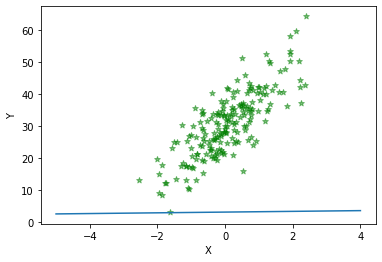

w_new [5.873446610978822, 1.1023454281382854]
355.5039050187037


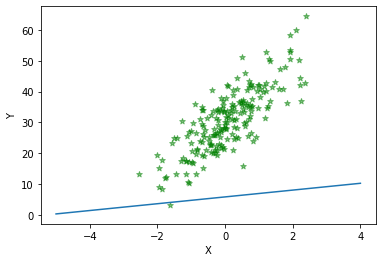

w_new [8.366165526017987, 1.9778657783247602]
289.3267499184995


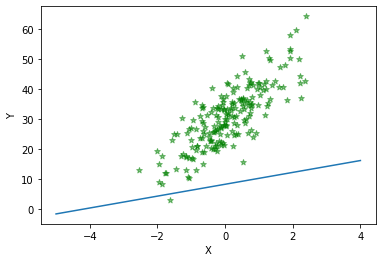

w_new [10.603129563187093, 2.753547324958939]
236.1799750745718


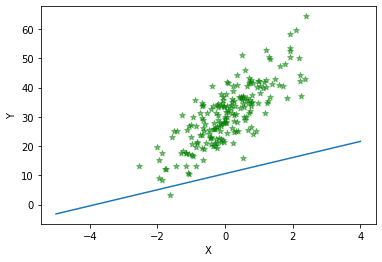

w_new [12.610653489037027, 3.440564026385428]
193.49509649539323


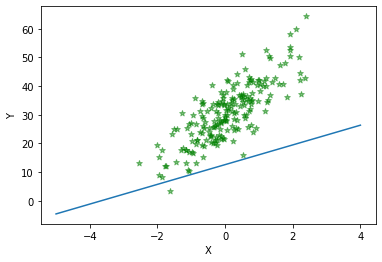

w_new [14.412337853388406, 4.048856351454087]
159.2103901995911


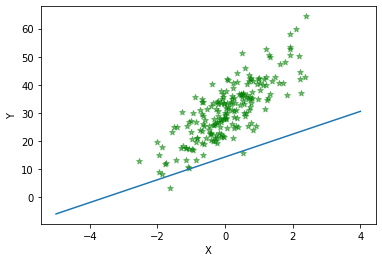

w_new [16.0293495446536, 4.587266032213945]
131.6708284668908


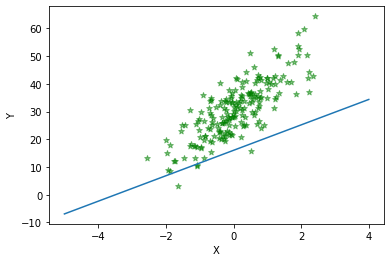

w_new [17.480673291820082, 5.063656213710697]
109.54778810165583


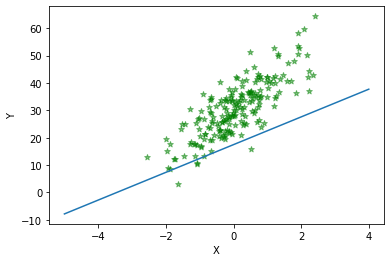

w_new [18.7833371265594, 5.485018573380515]
91.77462156224563


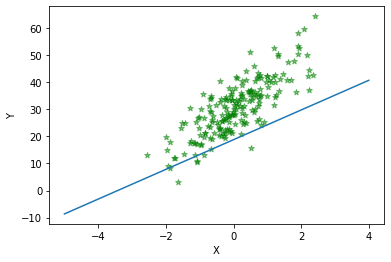

w_new [19.952614505935692, 5.857568814053481]
77.49495508304668


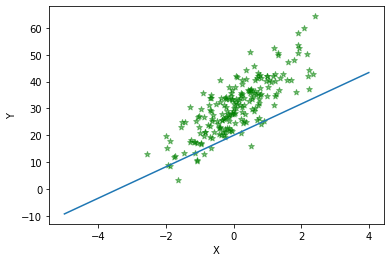

w_new [21.002205515744066, 6.186831784078626]
66.02119816099949


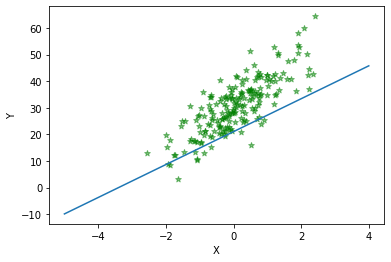

w_new [21.944399323224108, 6.4777173436470505]
56.801246289923824


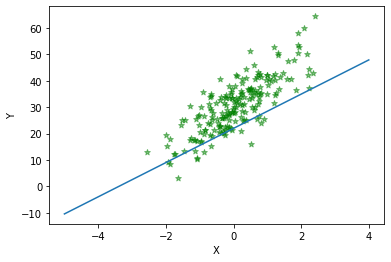

w_new [22.79021982273288, 6.734587976310905]
49.39175789964725


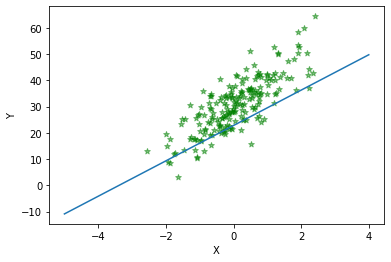

w_new [23.549556216205993, 6.961319037445921]
43.436706577550574


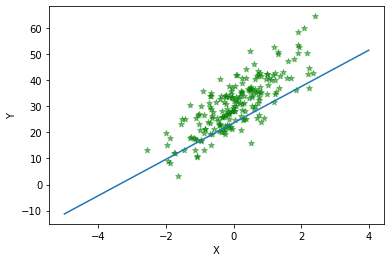

w_new [24.23128008944935, 7.1613524356181975]
38.6501664442448


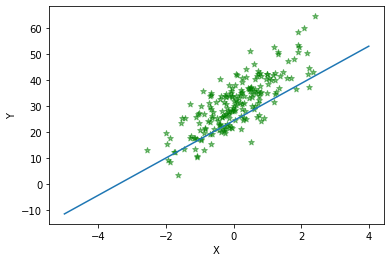

w_new [24.843350383306017, 7.337744457271138]
34.802494555336104


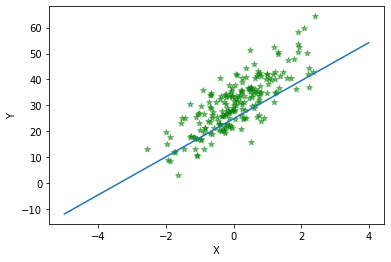

w_new [25.39290751357782, 7.493208368754656]
31.709239459080347


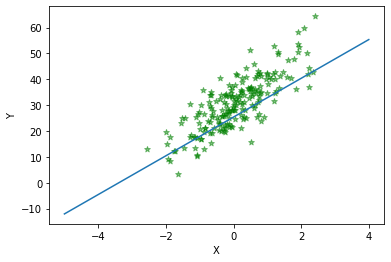

w_new [25.88635776349851, 7.630152361500887]
29.22223761683571


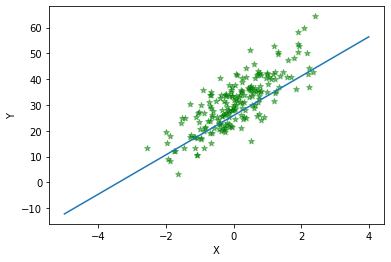

w_new [26.329448955986066, 7.750713345236864]
27.22246575546644


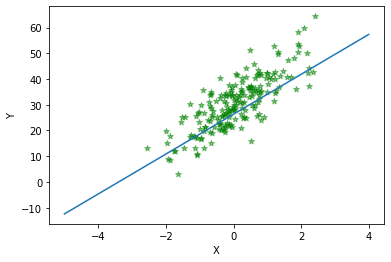

w_new [26.727338308440384, 7.85678703973609]
25.614302554322332


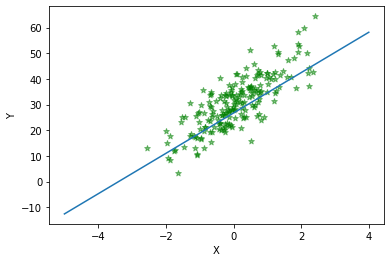

w_new [27.084653279240058, 7.950054767051352]
24.320921533807876


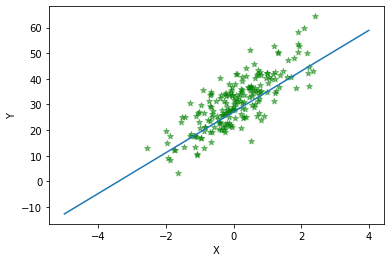

w_new [27.405546131200424, 8.032007302818467]
23.280591944370723


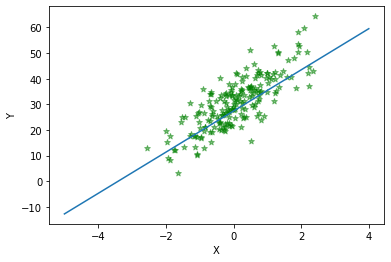

w_new [27.69374286207346, 8.10396610651881]
22.443708530267372


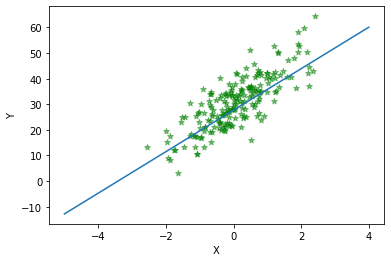

w_new [27.952587084793493, 8.167102216040767]
21.77040640846802


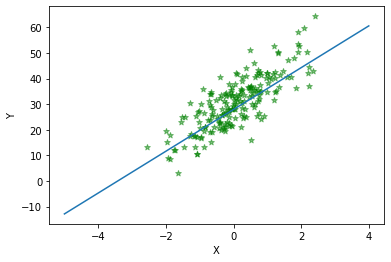

w_new [28.1850793797893, 8.222453061042739]
21.22864568158778


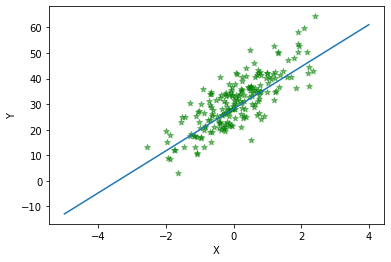

w_new [28.393912587566714, 8.270937422096216]
20.792673176173675


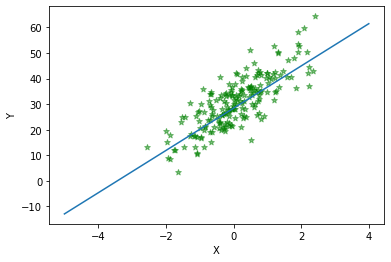

w_new [28.581503461264624, 8.313368738022628]
20.44178697219165


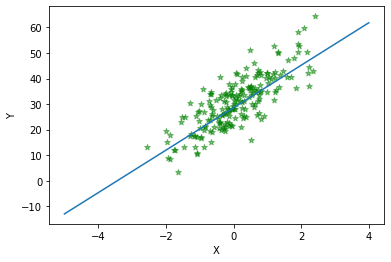

w_new [28.75002105541824, 8.350466941915155]
20.159344055135406


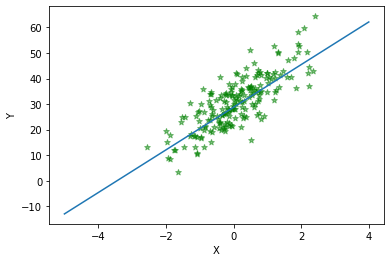

w_new [28.901412188203544, 8.382868986773879]
19.93196319200716


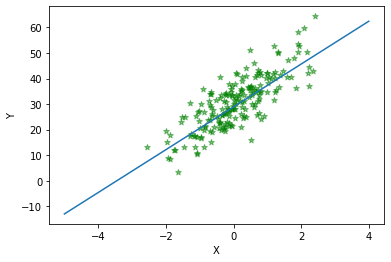

w_new [29.03742427951789, 8.411138204226754]
19.74888457866804


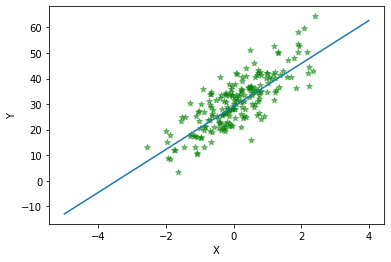

w_new [29.159625835953786, 8.435772624233959]
19.601455387770752


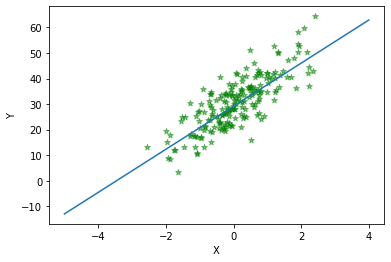

w_new [29.2694248256702, 8.45721236977788]
19.482716431969585


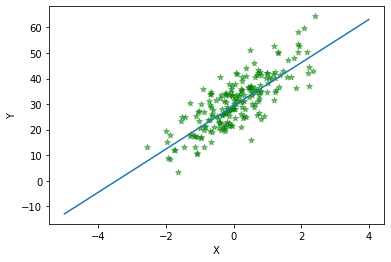

w_new [29.368085161021078, 8.475846228144906]
19.387070041859424


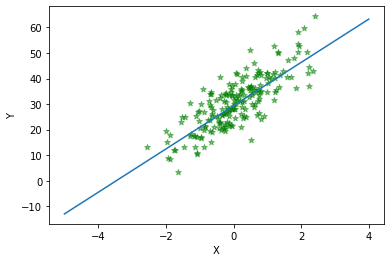

w_new [29.45674148426251, 8.492017489347575]
19.310013179228125


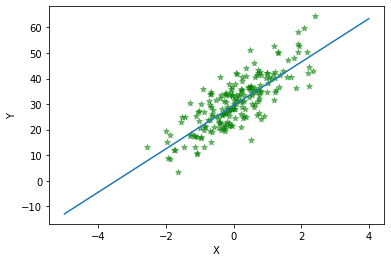

w_new [29.536412431457247, 8.506029132372674]
19.24792295396926


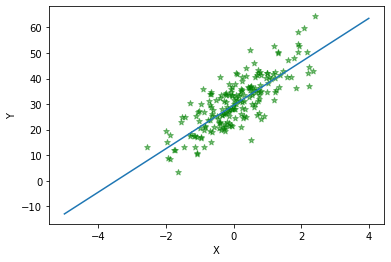

w_new [29.60801253158606, 8.518148431144402]
19.19788424005612


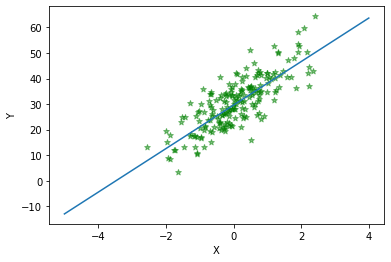

w_new [29.672362881642048, 8.528611044246796]
19.157551114830053


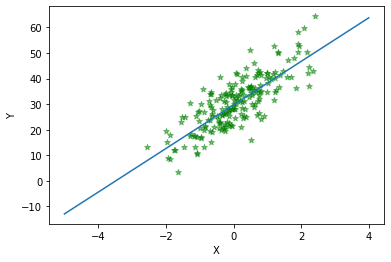

w_new [29.73020072393229, 8.537624645454327]
19.125035474814123


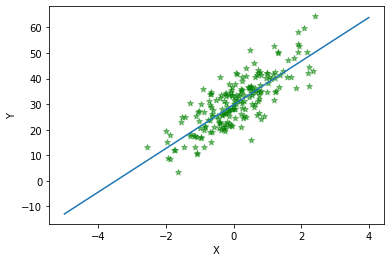

w_new [29.782188038766204, 8.545372145882025]
19.09881748922257


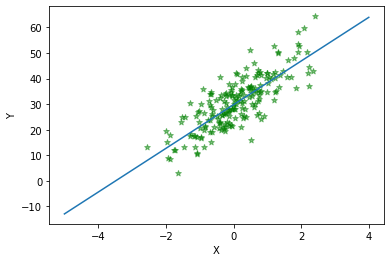

w_new [29.828919254015993, 8.552014553005522]
19.077673602614112


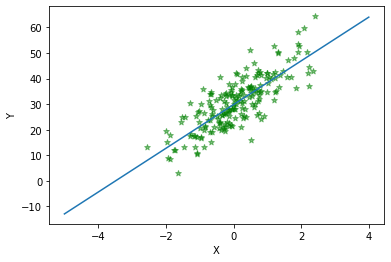

w_new [29.87092816255075, 8.557693506843796]
19.06061864154971


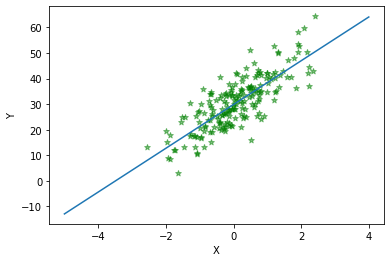

w_new [29.90869412914744, 8.562533529178292]
19.046859257450855


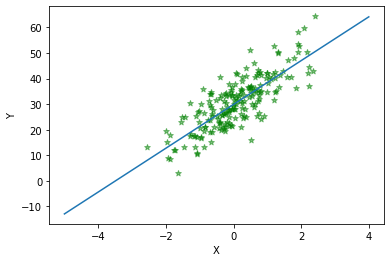

w_new [29.942647660055936, 8.566644017743355]
19.035756481849372


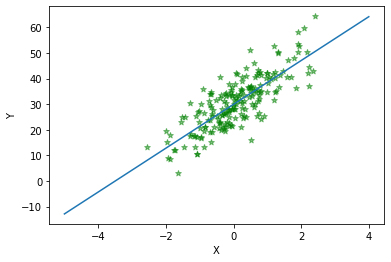

w_new [29.97317540084111, 8.57012101381262]
19.026795607153897


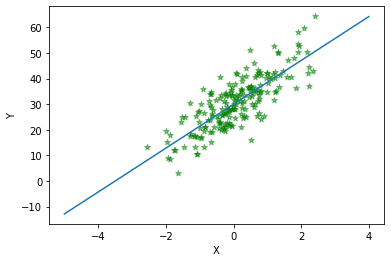

w_new [30.000624621352255, 8.573048768478005]
19.019561957024997


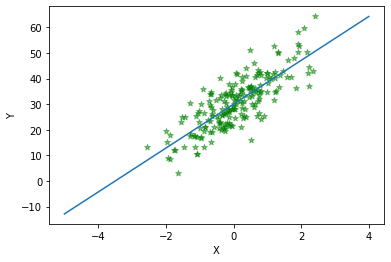

w_new [30.025307240597662, 8.57550113013079]
19.013721392385282


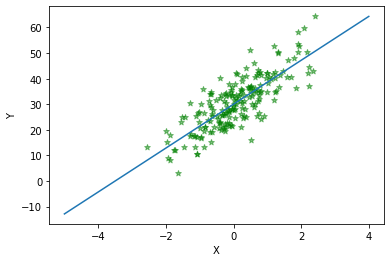

w_new [30.047503438857856, 8.577542773171217]
19.009004625587373


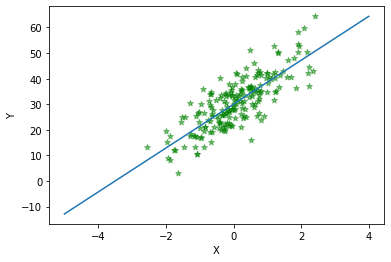

w_new [30.067464899489234, 8.579230285760998]
19.005194597236063


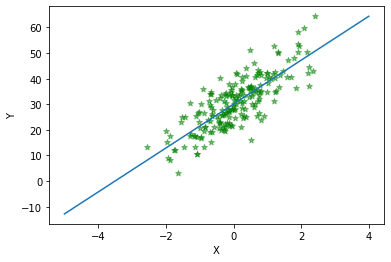

w_new [30.085417718492856, 8.580613132462974]
19.00211631637512


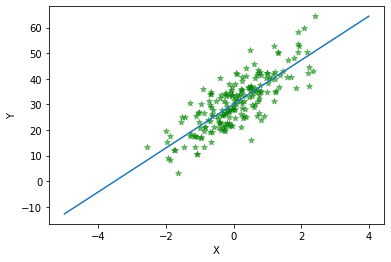

w_new [30.101565015998244, 8.581734505857439]
18.99962868224005


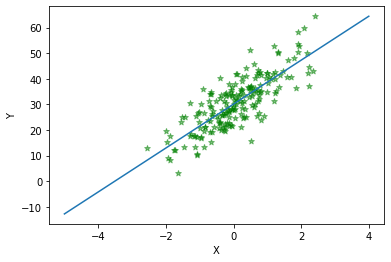

w_new [30.11608928029284, 8.582632079662158]
18.99761790019706


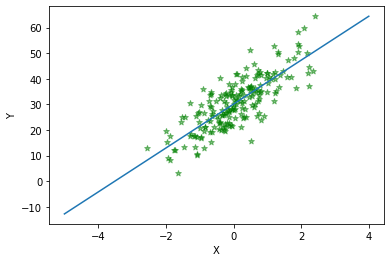

w_new [30.12915447187187, 8.583338674491873]
18.995992180371438


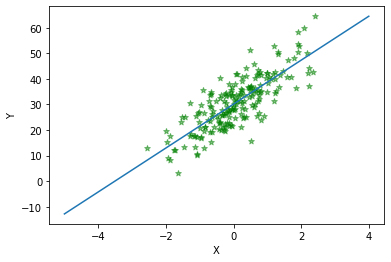

w_new [30.14090791215345, 8.583882846154577]
18.994677468461337


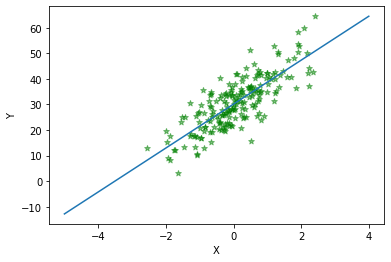

w_new [30.151481978966018, 8.584289405279359]
18.993614007260764


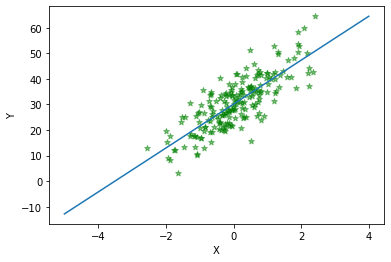

w_new [30.160995628639302, 8.58457987608947]
18.99275356682987


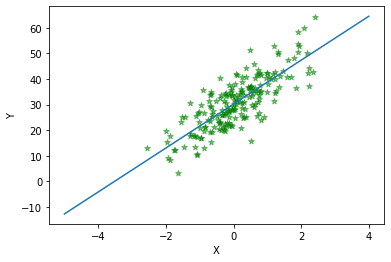

w_new [30.169555762489143, 8.584772901261081]
18.992057212939287


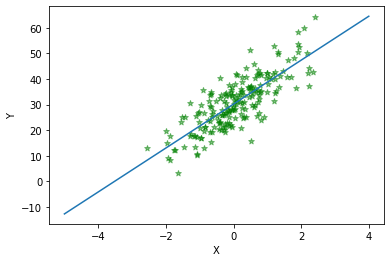

w_new [30.177258453655917, 8.584884599031389]
18.99149350889563


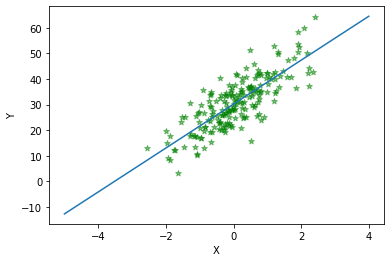

w_new [30.184190048614877, 8.584928878028586]
18.991037066345022


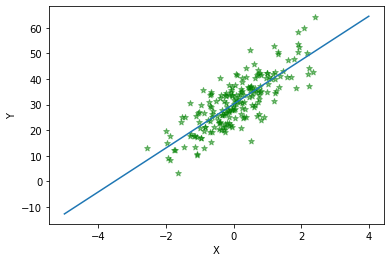

w_new [30.190428156204195, 8.584917714681556]
18.99066737713041


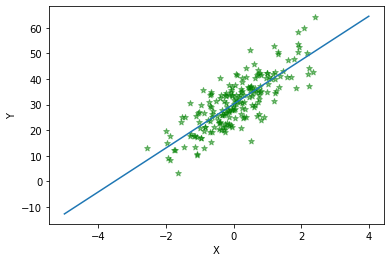

w_new [30.196042535696083, 8.584861397520429]
18.99036787153328


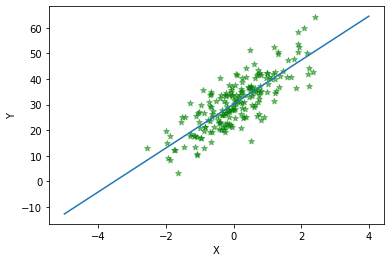

w_new [30.201095894251807, 8.584768742193141]
18.990125158892102


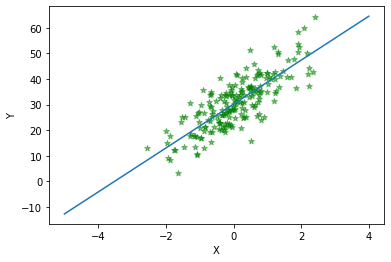

w_new [30.205644603039065, 8.58464728059093]
18.989928415168315


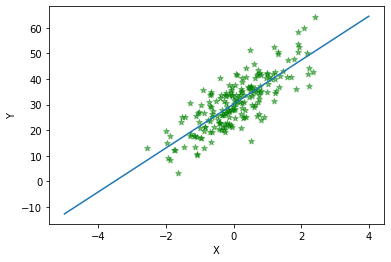

w_new [30.20973934033721, 8.584503427091704]
18.98976888893204


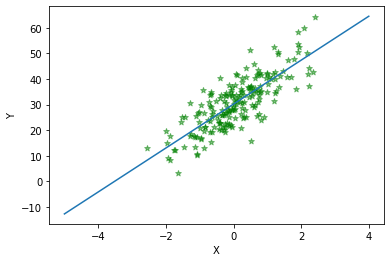

w_new [30.21342566910097, 8.58434262458882]
18.98963950279431


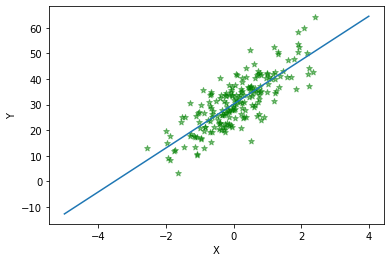

w_new [30.216744555686475, 8.584169472669567]
18.989534531782173


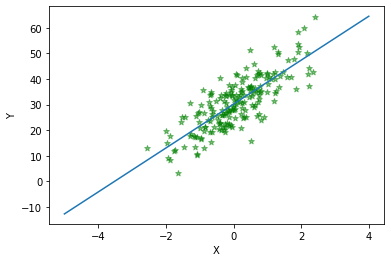

w_new [30.219732835755565, 8.58398784003826]
18.9894493437512


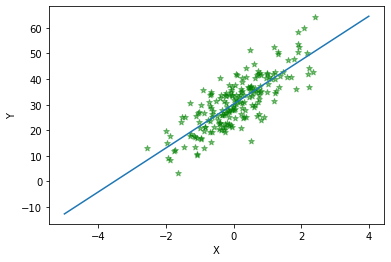

w_new [30.22242363275721, 8.583800963039536]
18.989380189826502


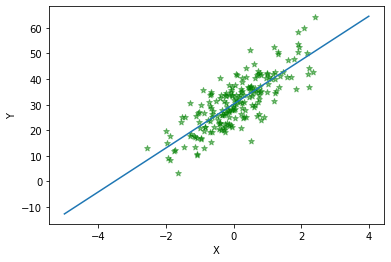

w_new [30.22484673383125, 8.583611531925033]
18.989324035195228


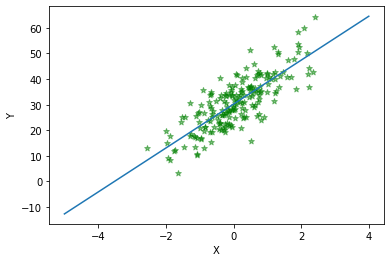

w_new [30.227028927482966, 8.583421766317985]
18.989278422451623


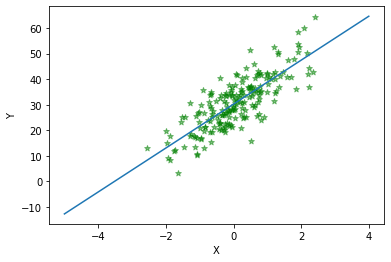

w_new [30.228994306931416, 8.583233481162887]
18.98924136120799


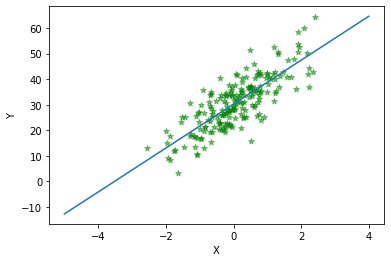

w_new [30.23076454263459, 8.583048144298838]
18.98921123890338


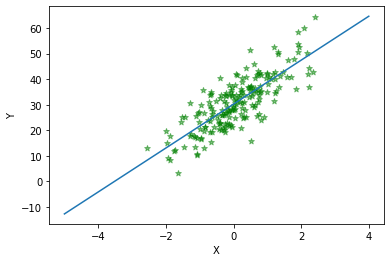

w_new [30.23235912713573, 8.582866926663364]
18.98918674872298


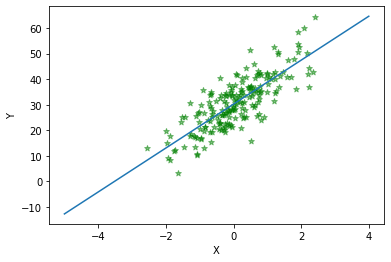

w_new [30.233795595053294, 8.582690746016727]
18.98916683133221


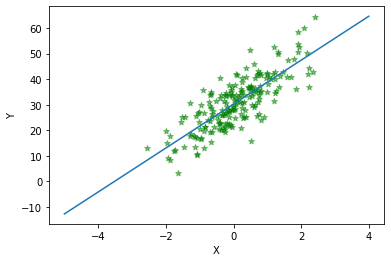

w_new [30.235089720748128, 8.582520304973011]
18.989150627766747


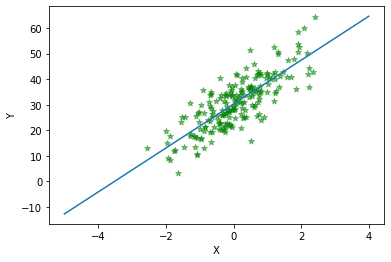

w_new [30.23625569594233, 8.582356124032495]
18.98913744133326


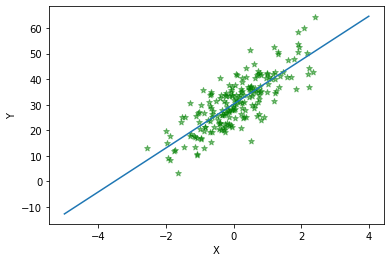

w_new [30.237306289331627, 8.582198570228412]
18.989126706789886


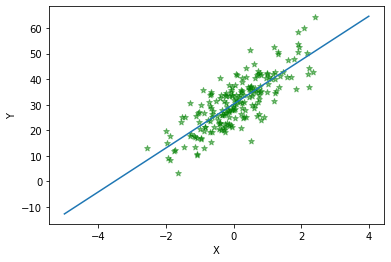

w_new [30.238252990024396, 8.582047881929046]
18.98911796540923


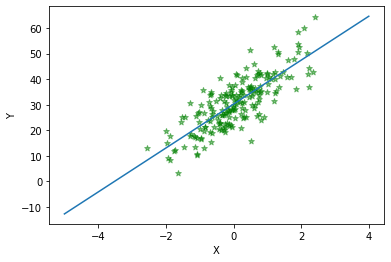

w_new [30.239106136453124, 8.581904190272326]
18.98911084479596


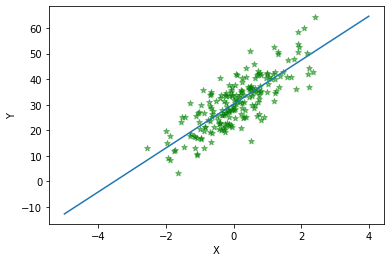

w_new [30.239875032236007, 8.581767537653477]
18.989105042548278


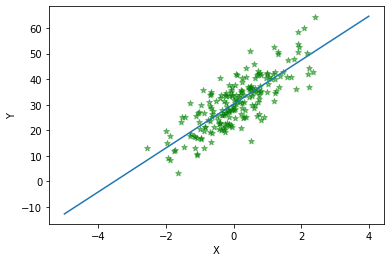

w_new [30.2405680503155, 8.581637893636303]
18.989100313027624


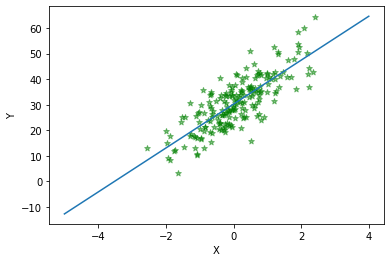

w_new [30.24119272656518, 8.581515168614374]
18.989096456642557


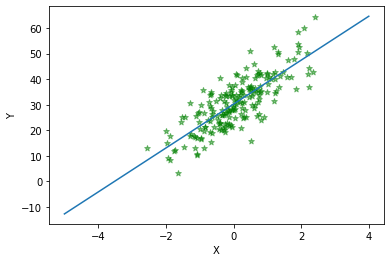

w_new [30.241755843934783, 8.58139922550924]
18.989093311166517


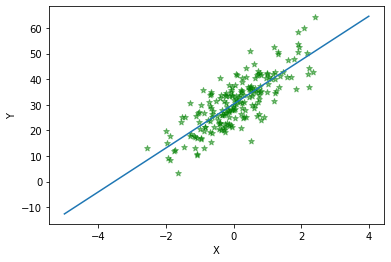

w_new [30.242263508094094, 8.581289889758237]
18.98909074470171


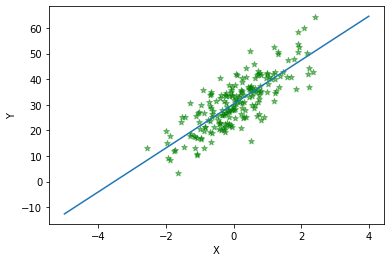

w_new [30.24272121543851, 8.58118695781375]
18.989088649975265


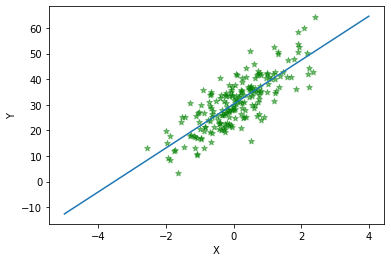

w_new [30.243133914231105, 8.581090204348932]
18.989086939714145


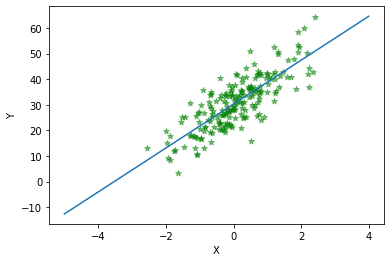

w_new [30.243506059577122, 8.580999388340873]
18.989085542893715


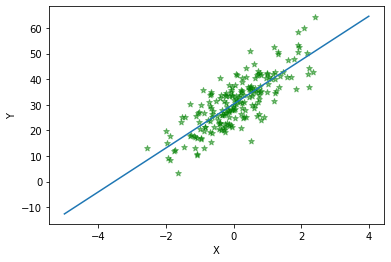

w_new [30.243841662855992, 8.580914258181277]
18.989084401694086


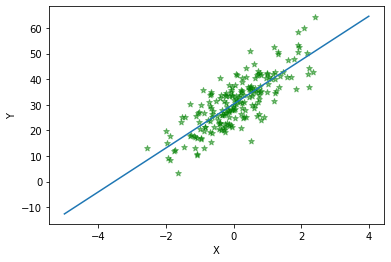

w_new [30.244144336172294, 8.580834555946055]
18.989083469029875
[30.244144336172294, 8.580834555946055]


In [15]:
w = descent(w,w,.1)
print(w)

# 5.) Inspecting the Best fit 

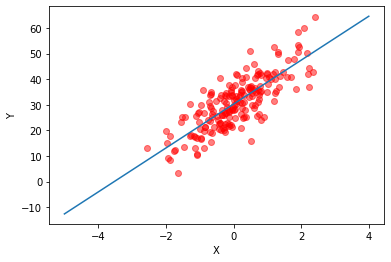

In [16]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return w[0]+w[1]*x

plt.scatter(X,y, c = "red",alpha=.5, marker = 'o')
graph(my_formula, range(-5,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 6.) Estimation

In [18]:
print(w[0]+w[1]*(3))

55.98664800401046
